In [1]:
import pytraj as pt
import MDAnalysis as mda
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



Bad key text.latex.preview in file /usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # w

In [4]:
folders = ['2', '10', '13', '35', '56', '59', '152', '211', '223', '235', '236', '249',
           '266', '272', '290']
folder = '2'
os.chdir(f'/home/nick/Documents/200ns/100ns/{folder}')
folder = '35'
trajectory_file = 'md_0_1_noPBC.xtc'
topology_file = 'md_0_1.tpr'
pdb_file = 'EKB1m.pdb'

In [66]:
# Load the trajectory
u = mda.Universe(topology_file, trajectory_file)

In [67]:
new = u.select_atoms("not (resname HOH)")
with mda.Writer("first_frame.pdb", new.n_atoms) as W:
    W.write(new)

/usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning:

Found no information for attr: 'altLocs' Using default value of ' '

/usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning:

Found no information for attr: 'icodes' Using default value of ' '

/usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning:

Found no information for attr: 'chainIDs' Using default value of ''

/usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning:

Found no information for attr: 'occupancies' Using default value of '1.0'

/usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning:

Found no information for attr: 'tempfactors' Using default value of '0.0'

/usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/MDAnalysis

In [68]:
frame_zero = 'first_frame.pdb'
traj_load = pt.load(trajectory_file, top=frame_zero)

In [69]:
rmsd = pt.rmsd(traj_load, ref = 0, mask = "@CA")

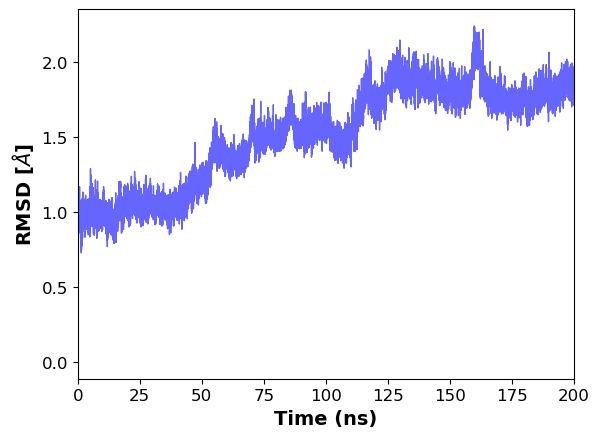

In [70]:
Write_the_trajectory = 10
stride_traj = 1
simulation_ns = 200

time = len(rmsd)*int(Write_the_trajectory)/1000
time_array = np.arange(0,time,int(Write_the_trajectory)/1000)*int(stride_traj)

# Plotting:
ax = plt.plot(time_array, rmsd, alpha=0.6, color = 'blue', linewidth = 1.0)
plt.xlim(0, simulation_ns)
#plt.ylim(2, 6)

plt.xlabel("Time (ns)", fontsize = 14, fontweight = 'bold')
plt.ylabel("RMSD [$\AA$]", fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig(f'RMSD_{folder}.png', dpi=1000, bbox_inches='tight')
plt.show()

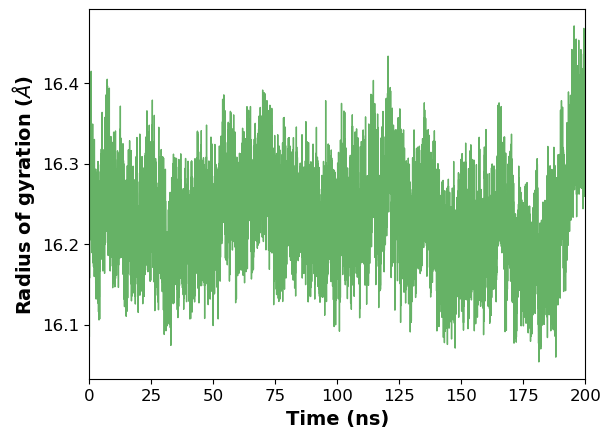

In [71]:
radgyr = pt.radgyr(traj_load, mask = "@CA")
time = len(rmsd)*int(Write_the_trajectory)/1000
time_array = np.arange(0,time,int(Write_the_trajectory)/1000)*int(stride_traj)

# Plotting:
plt.plot(time_array, radgyr, alpha=0.6, color = 'green', linewidth = 1.0)
plt.xlim(0, simulation_ns)
#plt.ylim(2, 6)

plt.xlabel("Time (ns)", fontsize = 14, fontweight = 'bold')
plt.ylabel("Radius of gyration ($\AA$)", fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig(f'RoG_{folder}.png', dpi=1000, bbox_inches='tight')
plt.show()

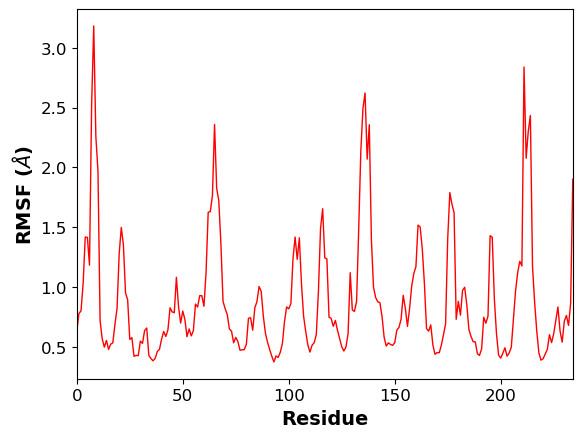

In [72]:
rmsf = pt.rmsf(traj_load, "@CA")
bfactor = pt.bfactors(traj_load, byres=True)

# Plotting:
plt.plot(rmsf[:,1], alpha=1.0, color = 'red', linewidth = 1.0)

plt.xlabel("Residue", fontsize = 14, fontweight = 'bold')
plt.ylabel("RMSF ($\AA$)", fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 12)
plt.xlim(0, len(rmsf[:-1]))

#plt.xticks(np.arange(min(rmsf[:1]), max(rmsf[:1])))
plt.yticks(fontsize = 12)
plt.savefig(f'RMSF_{folder}.png', dpi=1000, bbox_inches='tight')
plt.show()

In [73]:

Stride_Time = 20000
stride_time_prod = Stride_Time
Number_of_strides = 1
nstride = Number_of_strides
Integration_timestep = 2
dt_prod = Integration_timestep
Write_the_trajectory = 10
write_the_trajectory_prod = Write_the_trajectory

In [74]:
stride_time_ps = float(Stride_Time)*1000
simulation_time_analysis = stride_time_ps*nstride
simulation_ns = float(Stride_Time)*int(Number_of_strides)
number_frames = int(simulation_time_analysis)/int(write_the_trajectory_prod)
number_frames_analysis = number_frames/int(stride_traj)

In [75]:
time = len(rmsd)*int(Write_the_trajectory)/1000
time_array = np.arange(0,time,int(Write_the_trajectory)/1000)*int(stride_traj)

In [76]:
last_frame = len(time_array)

stride_ticks_f = (last_frame)/5
ticks_frame = np.arange(0,(len(time_array) + float(stride_ticks_f)), float(stride_ticks_f))
a = ticks_frame.astype(float)
a2 = a.tolist()
stride_ticks_t = (simulation_ns)/5
tick_time = np.arange(0,(float(simulation_ns) + float(stride_ticks_t)), float(stride_ticks_t))
b = tick_time.astype(float)

(20001, 39894)
(20001, 3)


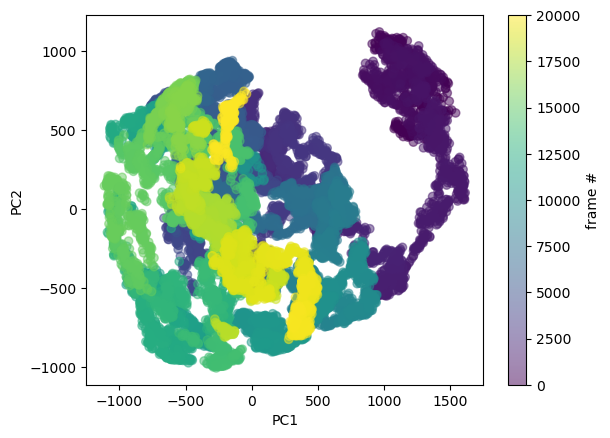

In [77]:
traj = traj_load
pca = PCA(n_components=3)

# superpose to 1st frame
pt.superpose(traj, ref=0, mask='!@H=')

# create average structure
avg = pt.mean_structure(traj)

# superpose all structures to average frame
pt.superpose(traj, ref=avg, mask='!@H=')

# perform PCA calculation and get transformed coords
# we need to reshape 3D traj.xyz array to 2D to make sklearn happy
# make a new traj by stripping all H atoms
traj_new = traj['!@H=']
xyz_2d = traj_new.xyz.reshape(traj_new.n_frames, traj_new.n_atoms * 3)
print(xyz_2d.shape)  # (n_frames, n_dimensions)

reduced_cartesian = pca.fit_transform(xyz_2d)
print(reduced_cartesian.shape)  # (n_frames, n_dimensions)

plt.figure()
plt.scatter(
    reduced_cartesian[:, 0],
    reduced_cartesian[:, 1],
    marker='o',
    c=range(traj_new.n_frames),
    alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
cbar.set_label('frame #')
plt.savefig(f'2D_PCA_{folder}.png', dpi=1000, bbox_inches='tight')

In [78]:
import plotly.express as px
import pandas as pd
import plotly.io as pio

df = pd.DataFrame({
    'PC1': reduced_cartesian[:, 0],
    'PC2': reduced_cartesian[:, 1],
    'PC3': reduced_cartesian[:, 2],
    'time': range(traj_new.n_frames)
})

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='time',
                   color_continuous_scale='Greens', opacity=0.5)

# add this code to set the background color to white
fig.update_layout(template="seaborn")
fig.write_image(f"3D_PCA_{folder}.png", scale=2)
fig.show()


In [79]:
# Define the chunk size
import plotly.express as px
chunk_size = 1001


distances = []
# Calculate the Euclidean distance between chunks of points in the 3D scatter plot
for i in range(0, len(df), chunk_size):
    for j in range(i+chunk_size, len(df), chunk_size):
        chunk1 = df.iloc[i:i+chunk_size, :]
        chunk2 = df.iloc[j:j+chunk_size, :]

        # Extract the PCA coordinates for these chunks of points
        x1 = chunk1['PC1']
        y1 = chunk1['PC2']
        z1 = chunk1['PC3']
        x2 = chunk2['PC1']
        y2 = chunk2['PC2']
        z2 = chunk2['PC3']

        # Calculate the pairwise distances between the points in these chunks
        diff_x = (x1.values.reshape(-1, 1) - x2.values.flatten()).flatten()
        diff_y = (y1.values.reshape(-1, 1) - y2.values.flatten()).flatten()
        diff_z = (z1.values.reshape(-1, 1) - z2.values.flatten()).flatten()
        dist_flat = np.sqrt(diff_x**2 + diff_y**2 + diff_z**2)

         # Calculate the mean distance
        mean_dist = np.mean(dist_flat)

        # Add the mean distance to the list for these chunks
        distances.append(mean_dist)

In [80]:
# Check that the number of distances matches the number of pairs of chunks
num_chunks = int(np.ceil(len(df) / chunk_size))
num_pairs = num_chunks * (num_chunks - 1) // 2
if len(distances) != num_pairs:
    raise ValueError(f"Expected {num_pairs} distances but got {len(distances)}")

# Reshape the distances list into a 2D array for plotting
dist_matrix = np.zeros((num_chunks, num_chunks))
idx = 0
for i in range(num_chunks):
    for j in range(i+1, num_chunks):
        dist_matrix[i, j] = distances[idx]
        dist_matrix[j, i] = distances[idx]
        idx += 1
fig = px.imshow(dist_matrix,
                x=[f"Chunk {i}" for i in range(1, num_chunks+1)],
                y=[f"Chunk {i}" for i in range(1, num_chunks+1)],
                color_continuous_scale='RdBu_r')
fig.update_layout(title='Mean Distance Between Chunks',
                  xaxis_title='Chunk',
                  yaxis_title='Chunk',
                  template="seaborn")
fig.write_image(f"Distance_Matrix_PC_chunkcs_{folder}.png", scale=2)
fig.show()